In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Import necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [5]:
# Step 1: Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 268s 2us/step


In [7]:
# Step 2: Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

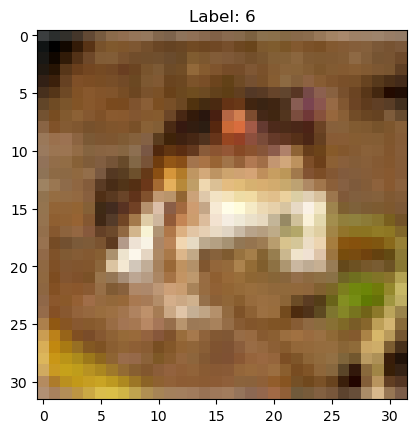

In [9]:
# Step 3: Display the first image in the training dataset
plt.imshow(x_train[0])  # Display the first image from training set
plt.title(f"Label: {y_train[0][0]}")  # Display the corresponding label for the image
plt.show()

In [11]:
# Step 4: Define the class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print("Class names:", class_names)

Class names: ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


In [13]:
# Step 5: Build a Convolutional Neural Network (CNN) model
model = Sequential([
    # First Convolutional Layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),  # Max-pooling layer
    
    # Second Convolutional Layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),  # Max-pooling layer
    
    Flatten(),  # Flatten the 2D array into a 1D vector
    Dense(128, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Dropout to avoid overfitting
    Dense(10, activation='softmax')  # Output layer with 10 classes
])

C:\Users\Vyshnavi\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Step 6: Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Step 7: Train the model on the training data
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.3357 - loss: 1.8080 - val_accuracy: 0.5721 - val_loss: 1.2122
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5367 - loss: 1.3048 - val_accuracy: 0.6074 - val_loss: 1.1262
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.5969 - loss: 1.1454 - val_accuracy: 0.6370 - val_loss: 1.0675
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6294 - loss: 1.0564 - val_accuracy: 0.6633 - val_loss: 0.9626
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.6515 - loss: 0.9885 - val_accuracy: 0.6841 - val_loss: 0.9192
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.6787 - loss: 0.9181 - val_accuracy: 0.7005 - val_loss: 0.8712
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6918 - loss: 0.8829 - val_accuracy: 0.6988 - val_loss: 0.8665
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.7069 -

In [19]:
# Step 8: Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7111 - loss: 0.8444
Test Accuracy: 71.16%


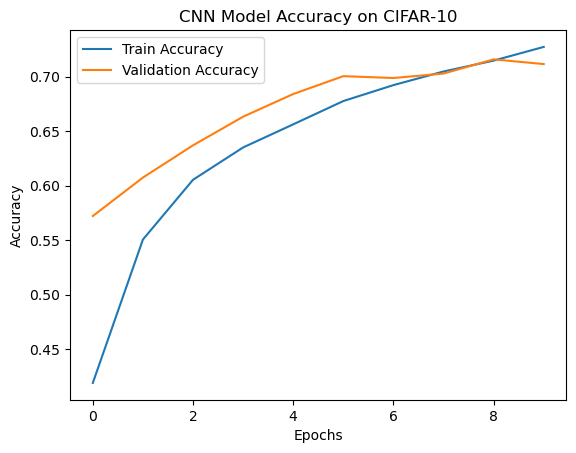

In [21]:
# Step 9: Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Model Accuracy on CIFAR-10')
plt.show()